<a href="https://colab.research.google.com/github/phani3755/PhaniMasterproject/blob/main/Predictive_Analysis_of_EV_Charging_ML_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# Initial analysis

In [ ]:
# file path
file_path = '/content/drive/MyDrive/Projects/Masters projects_2024/EV_charging/station_data_dataverse.csv'

# load the dataset
ev_df = pd.read_csv(file_path)
ev_df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [ ]:
# Dataset size
print(ev_df.shape)

(3395, 24)


In [ ]:
# Dataset features
print(ev_df.columns)

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')


In [ ]:
# Dataset information
print(ev_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

In [ ]:
# Dataset description
ev_df.describe()

,sessionId,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
count,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,5.487001e+06,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378,5.742395e+07,576789.678056,629934.460677,0.595582,2.428571,0.181443,0.187040,0.210015,0.216495,0.179676,0.018262,0.007069,0.703976
std,2.590657e+06,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571,2.674772e+07,257486.310402,255620.993849,0.490851,0.811204,0.385442,0.390001,0.407379,0.411916,0.383974,0.133918,0.083793,0.456569
min,1.004821e+06,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911,1.042767e+07,129465.000000,125372.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.234666e+06,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871,3.329548e+07,369001.000000,481066.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.451498e+06,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826,4.924181e+07,549414.000000,503205.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.746644e+06,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053,8.188052e+07,864630.000000,878393.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.998981e+06,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292,9.834581e+07,995505.000000,978130.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking missing values
ev_df.isnull().sum()

,0
sessionId,0
kwhTotal,0
dollars,0
created,0
ended,0
startTime,0
endTime,0
chargeTimeHrs,0
weekday,0
platform,0


# Data analysis with visualization

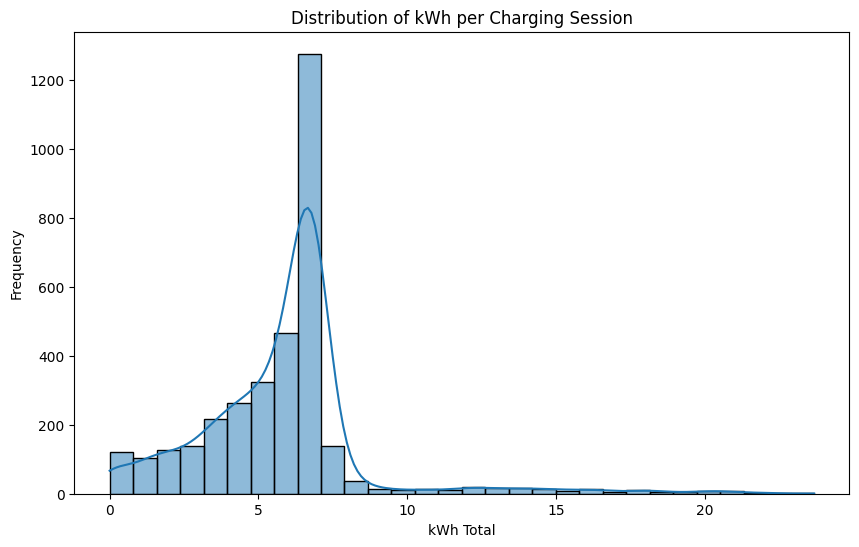

In [ ]:
# Distribution of kWh per charging session
plt.figure(figsize=(10, 6))
sns.histplot(ev_df['kwhTotal'], bins=30, kde=True)
plt.title('Distribution of kWh per Charging Session')
plt.xlabel('kWh Total')
plt.ylabel('Frequency')
plt.show()

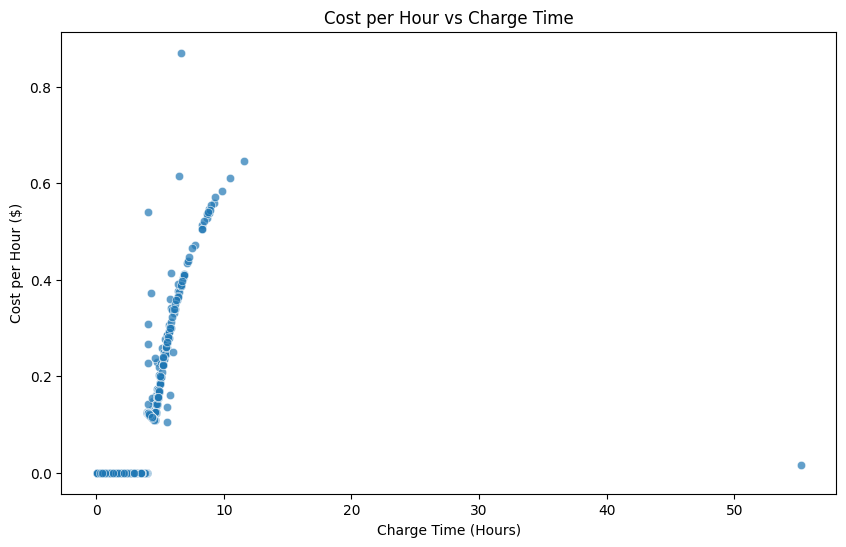

In [ ]:
cost_per_hour = ev_df['dollars'] / (ev_df['chargeTimeHrs'] + 1e-5)

# Cost per Hour vs Charge Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chargeTimeHrs', y= cost_per_hour, data=ev_df, alpha=0.7)
plt.title('Cost per Hour vs Charge Time')
plt.xlabel('Charge Time (Hours)')
plt.ylabel('Cost per Hour ($)')
plt.show()

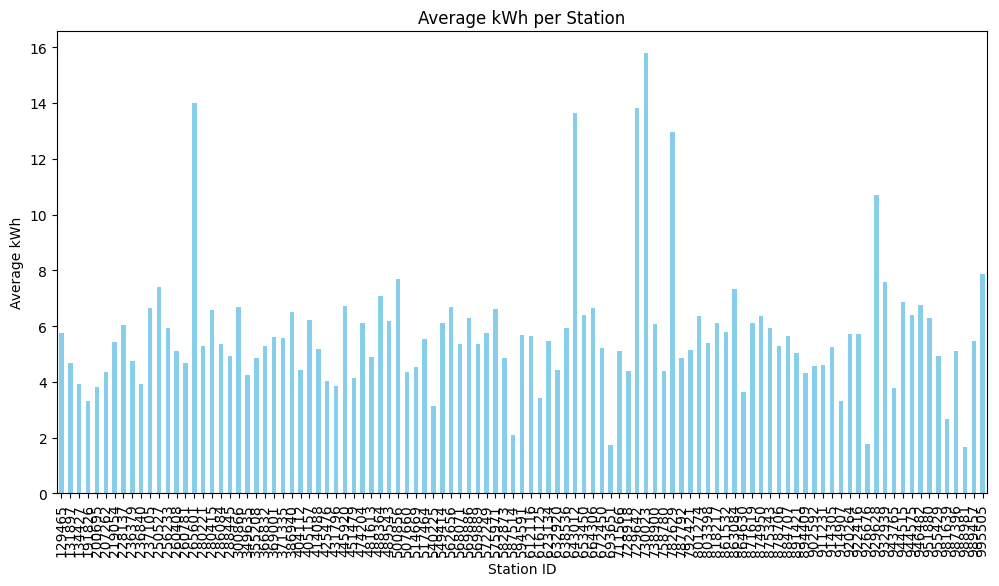

In [ ]:
# Average kWh per Station
station_avg_kwh = ev_df.groupby('stationId')['kwhTotal'].mean()
plt.figure(figsize=(12, 6))
station_avg_kwh.plot(kind='bar', color='skyblue')
plt.title('Average kWh per Station')
plt.xlabel('Station ID')
plt.ylabel('Average kWh')
plt.show()

<Figure size 1200x600 with 0 Axes>

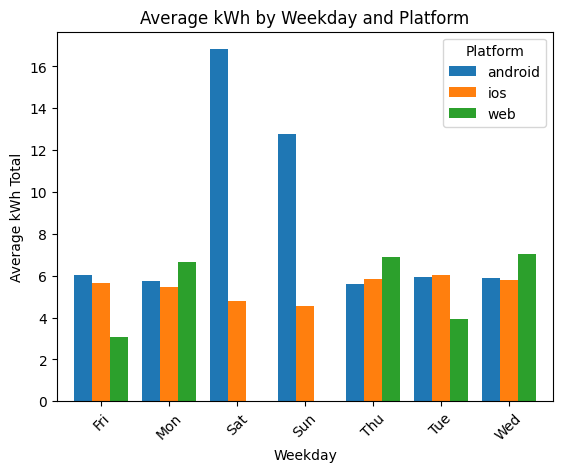

In [ ]:
# Calculate the average kwhTotal for each combination of weekday and platform
avg_kwh = ev_df.groupby(['weekday', 'platform'])['kwhTotal'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
avg_kwh.plot(kind='bar', width=0.8)
plt.title('Average kWh by Weekday and Platform')
plt.xlabel('Weekday')
plt.ylabel('Average kWh Total')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

<Figure size 1200x600 with 0 Axes>

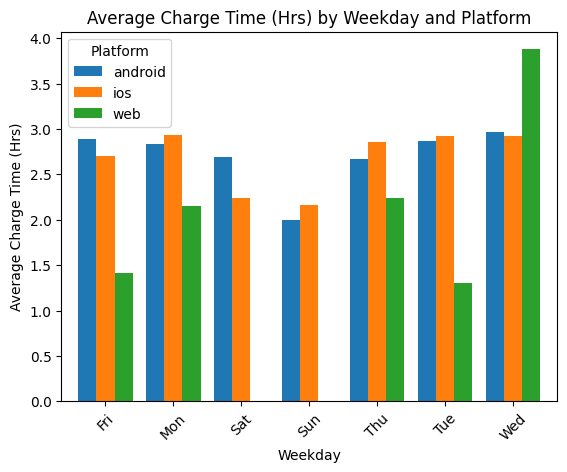

In [ ]:
# Calculate the average Charge Time (Hrs) for each combination of weekday and platform
avg_charge_hur = ev_df.groupby(['weekday', 'platform'])['chargeTimeHrs'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
avg_charge_hur.plot(kind='bar', width=0.8)
plt.title('Average Charge Time (Hrs) by Weekday and Platform')
plt.xlabel('Weekday')
plt.ylabel('Average Charge Time (Hrs)')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()

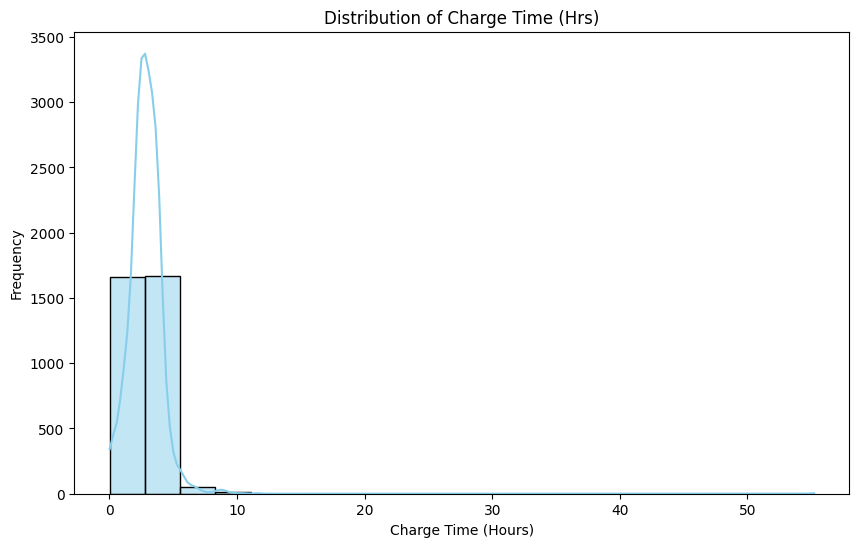

In [ ]:
# Distribution of 'chargeTimeHrs' (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(ev_df['chargeTimeHrs'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Charge Time (Hrs)')
plt.xlabel('Charge Time (Hours)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def plot_boxplot(dataframe, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=dataframe[column_name], color='lightgreen')
    plt.title(f'Box Plot of {column_name.replace("_", " ").title()}')
    plt.ylabel(column_name.replace("_", " ").title())
    plt.show()

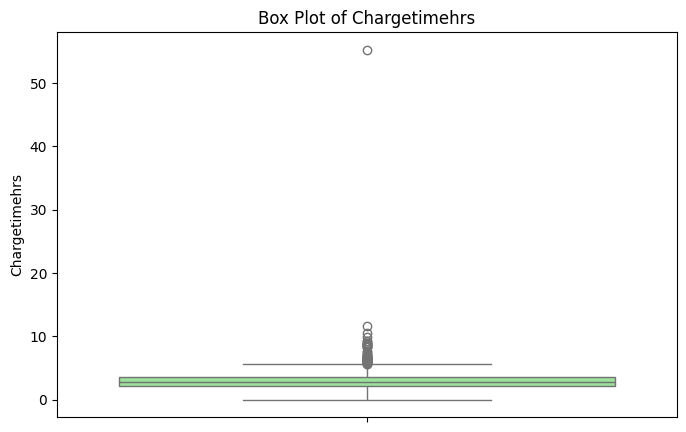

In [ ]:
plot_boxplot(ev_df, 'chargeTimeHrs')

In [ ]:
# Bubble Chart of Distance (miles) vs. Weekday with Charge Time
fig = px.scatter(
    ev_df, x='distance', y='weekday', size='chargeTimeHrs', color='weekday',
    title="Bubble Chart of Distance (miles) vs. Weekday with Charge Time",
    labels={'weekday': 'Weekday', 'distance': 'Distance', 'chargeTimeHrs': 'Charge Time (Hrs)'}
)
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

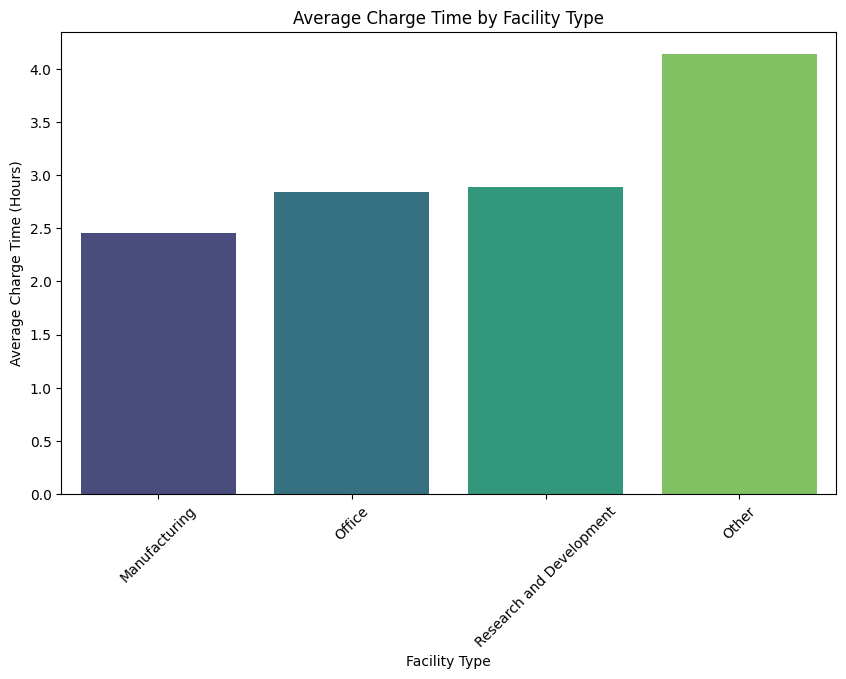

In [ ]:
# Sample facility type mapping
facility_type_mapping = {
    1: 'Manufacturing',
    2: 'Office',
    3: 'Research and Development',
    4: 'Other'
}

# Mapping facility types to a new variable without altering ev_df
facility_types = ev_df['facilityType'].map(facility_type_mapping)

# Grouping by facility type and calculating the average charge time
avg_charge_time = ev_df.groupby('facilityType')['chargeTimeHrs'].mean().reset_index()

# Adding a new column with facility type names for plotting
avg_charge_time['Facility Type'] = avg_charge_time['facilityType'].map(facility_type_mapping)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_charge_time, x='Facility Type', y='chargeTimeHrs', palette='viridis')
plt.title('Average Charge Time by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Average Charge Time (Hours)')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

In [ ]:
# Replace null values in 'distance' column with the mean
ev_df['distance'].fillna(ev_df['distance'].mean(), inplace=True)

In [ ]:
# Checking missing values
ev_df.isnull().sum()

,0
sessionId,0
kwhTotal,0
dollars,0
created,0
ended,0
startTime,0
endTime,0
chargeTimeHrs,0
weekday,0
platform,0


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'chargeTimeHrs'
Q1 = ev_df['chargeTimeHrs'].quantile(0.25)
Q3 = ev_df['chargeTimeHrs'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
ev_df = ev_df[(ev_df['chargeTimeHrs'] >= lower_bound) & (ev_df['chargeTimeHrs'] <= upper_bound)]

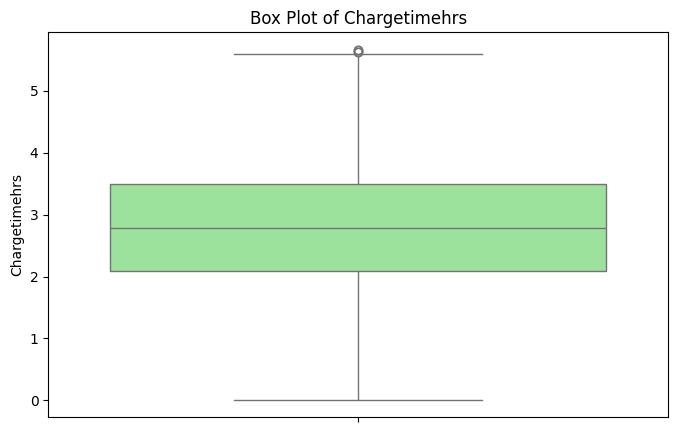

In [ ]:
plot_boxplot(ev_df, 'chargeTimeHrs')

In [ ]:
# The features selected for analysis are primarily those that have a direct impact on
# charging behavior and outcomes.

# Excluded Features:
# - sessionId: This is a unique identifier for each session and does not contribute
#   to the predictive power of the model as it does not hold relevant information
#   about charging behavior.
#
# - dollars: While financial data can be important, it may not directly influence
#   the charging duration or patterns we are analyzing, making it less relevant for
#   this specific model.
#
# - created, ended, startTime, endTime: These datetime features can be transformed
#   to extract meaningful insights (e.g., time of day), but in their raw form, they
#   do not provide direct predictive value for the target variable.
#
# - userId, stationId, locationId: These identifiers might introduce bias or
#   overfitting due to their uniqueness. They do not provide generalizable insights
#   that can help predict charge time.
#
# - managerVehicle: This feature is not considered essential as it may not directly
#   affect the charging process or duration in a measurable way.
#
# - Mon, Tues, Wed, Thurs, Fri, Sat, Sun: While these binary indicators for days
#   of the week provide useful information about when charging occurs, the weekday
#   feature captures the necessary variability without the need for additional
#   binary features.

selected_features = ev_df[['chargeTimeHrs', 'distance', 'kwhTotal', 'facilityType', 'weekday', 'platform']]

In [ ]:
selected_features

,chargeTimeHrs,distance,kwhTotal,facilityType,weekday,platform
0,1.510556,18.652378,7.78,3,Tue,android
1,2.177222,18.652378,9.74,3,Wed,android
2,4.671667,18.652378,6.76,3,Fri,android
3,1.768333,18.652378,6.17,3,Wed,android
4,0.298611,18.652378,0.93,3,Thu,android
...,...,...,...,...,...,...
3390,3.463889,13.352643,6.74,2,Thu,ios
3391,2.971389,13.352643,6.86,2,Fri,ios
3392,3.495556,2.337085,6.07,3,Wed,android
3393,2.202778,4.671064,5.74,2,Thu,ios


In [ ]:
# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'weekday' column and replace the original column
selected_features['weekday'] = label_encoder.fit_transform(selected_features['weekday'])

# Apply label encoding to the 'platform' column and replace the original column
selected_features['platform'] = label_encoder.fit_transform(selected_features['platform'])

# Conversion to minutes
selected_features['chargeTimeHrs'] = selected_features['chargeTimeHrs'] * 60

In [ ]:
# Separate features and target variable
X = selected_features.drop('chargeTimeHrs', axis=1)
y = selected_features['chargeTimeHrs']

In [ ]:
# Apply log transformation to the target variable
y_log = np.log(y)

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the features
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_ev, X_test_ev, y_train_ev, y_test_ev = train_test_split(X_scaled_df, y_log, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training set shape: {X_train_ev.shape}')
print(f'Testing set shape: {X_test_ev.shape}')

Training set shape: (2668, 5)
Testing set shape: (668, 5)


# Model implementation

In [ ]:
def evaluate_model(y_true, y_pred):
    """
    Evaluates the performance of a regression model.

    Parameters:
    y_true (array-like): True values of the target variable.
    y_pred (array-like): Predicted values from the model.

    Returns:
    dict: A dictionary containing MSE, RMSE, and R² score.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

## 1.Linear Regression

In [ ]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train_ev, y_train_ev)

# Predictions and evaluation
predictions_linear = linear_model.predict(X_test_ev)

In [ ]:
liner_metrics = evaluate_model(y_test_ev, predictions_linear)
liner_metrics

{'MSE': 0.5593638781654618,
 'RMSE': 0.7479063298070567,
 'R²': 0.21712983394101515}

## 2.Random Forest Regression

In [ ]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_ev, y_train_ev)

# Predictions and evaluation
predictions_rf = rf_model.predict(X_test_ev)

In [ ]:
rf_metrics = evaluate_model(y_test_ev, predictions_rf)
rf_metrics

{'MSE': 0.22737855579098268,
 'RMSE': 0.4768422755911882,
 'R²': 0.6817672812299771}

## 3.Support Vector Regression (SVR)


In [ ]:
# Initialize and train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_ev, y_train_ev)

# Predictions and evaluation
predictions_svr = svr_model.predict(X_test_ev)

In [ ]:
svr_metrics = evaluate_model(y_test_ev, predictions_svr)
svr_metrics

{'MSE': 0.43390499587620274,
 'RMSE': 0.65871465436576,
 'R²': 0.3927186051242586}

## 4.K-Nearest Neighbors Regression (KNN)

In [ ]:
# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_ev, y_train_ev)

# Predictions and evaluation
predictions_knn = knn_model.predict(X_test_ev)

In [ ]:
knn_metrics = evaluate_model(y_test_ev, predictions_knn)
knn_metrics

{'MSE': 0.34076047915284186, 'RMSE': 0.58374693074383, 'R²': 0.523081086723636}

## 5.XGB

In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_ev, y_train_ev)

# Predictions
predictions_xgb = xgb_model.predict(X_test_ev)

In [ ]:
xgb_metrics = evaluate_model(y_test_ev, predictions_xgb)
xgb_metrics

{'MSE': 0.2308839865042362,
 'RMSE': 0.480503888126034,
 'R²': 0.6768611776510448}

## Results

In [ ]:
# Sample dictionaries of model evaluation metrics
model_metrics = {
    'Linear Regression': liner_metrics,
    'Random Forest Regression': rf_metrics ,
    'SVR': svr_metrics,
    'KNN Regression': knn_metrics,
    'XGBoost' : xgb_metrics
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T
metrics_df

,MSE,RMSE,R²
Linear Regression,0.559364,0.747906,0.217130
Random Forest Regression,0.227379,0.476842,0.681767
SVR,0.433905,0.658715,0.392719
KNN Regression,0.340760,0.583747,0.523081
XGBoost,0.230884,0.480504,0.676861


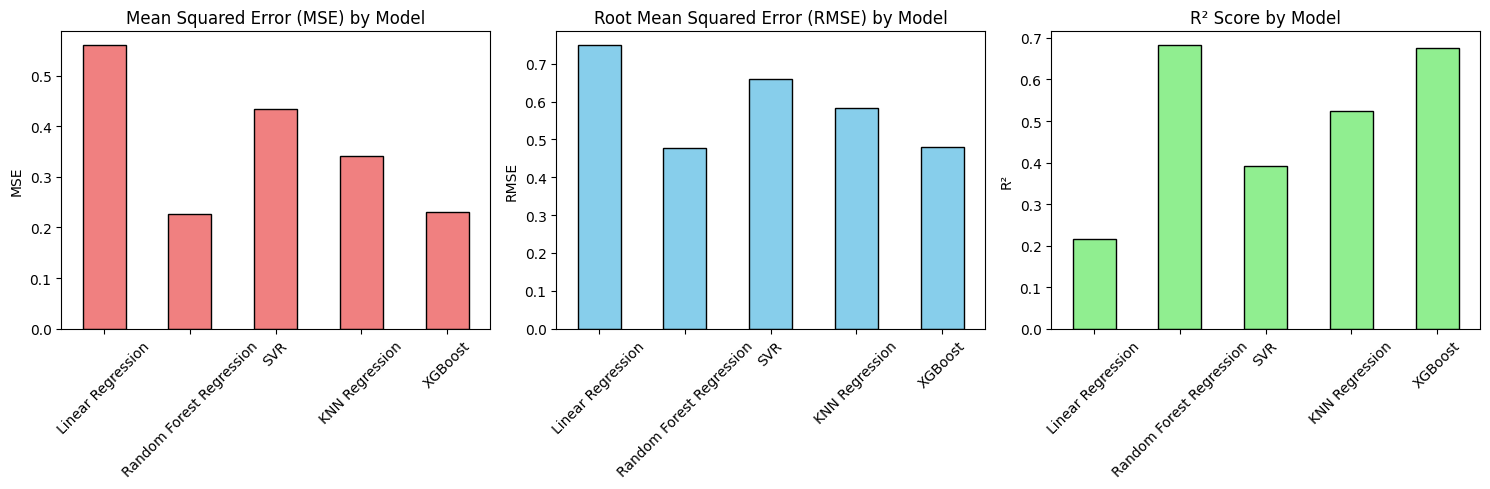

In [ ]:
# Set the plot size and layout
plt.figure(figsize=(15, 5))

# Plot for MSE
plt.subplot(1, 3, 1)
metrics_df['MSE'].plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Mean Squared Error (MSE) by Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plot for RMSE
plt.subplot(1, 3, 2)
metrics_df['RMSE'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Root Mean Squared Error (RMSE) by Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Plot for R²
plt.subplot(1, 3, 3)
metrics_df['R²'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('R² Score by Model')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Hyperparameter tuning

## LinearRegression

In [ ]:
# Initialize Linear Regression with available parameters
linear_model = LinearRegression()
param_grid_linear = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Hyperparameter tuning
grid_search_linear = GridSearchCV(linear_model, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train_ev, y_train_ev)

# Get the best parameters and evaluate the model
best_linear_model = grid_search_linear.best_estimator_
print("Best Parameters for Linear Regression:", grid_search_linear.best_params_)

# Predictions and evaluation
predictions_linear = best_linear_model.predict(X_test_ev)
linear_metrics = evaluate_model(y_test_ev, predictions_linear)
print("Evaluation Metrics for Linear Regression:", linear_metrics)

Best Parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Evaluation Metrics for Linear Regression: {'MSE': 0.5593638781654618, 'RMSE': 0.7479063298070567, 'R²': 0.21712983394101515}
